In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("output.csv", index_col=0)


/Library/Python/3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
print(len(df))

In [ ]:
# Looks like we are getting lots of duplicate results?
print(len(df.ID))
print(len(df.ID.unique()))

In [9]:
# Lots of duplicate rows, need to remove dupes
print(df.head().ID)
print(df[df.ID == 27922475])

0    27922475
1    27255406
2    27511991
3    27328154
4    26016142
Name: ID, dtype: int64
             ID   price dealerType      make  model    mileage  year fuelType  \
0      27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
0      27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
0      27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
0      27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
0      27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
...         ...     ...        ...       ...    ...        ...   ...      ...   
15871  27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
16112  27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
16142  27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
16321  27922475  13,445       SIMI  Vauxhall  Astra  78,666 km  2017   Diesel   
16621  27922475 

In [2]:
deduped_df = df.drop_duplicates()
print(len(deduped_df))
# Drop rows with nan price and year
deduped_df.replace("nan", np.nan)
deduped_df.dropna(subset=['price', 'year'], inplace=True)
print(len(deduped_df))

15573
14745


/Library/Python/3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [3]:
# Convert price column to int
deduped_df.price.head()
deduped_df.price = deduped_df.price.apply(lambda x: str(x).replace(',',''))
deduped_df.price = deduped_df.price.astype("int64")

/Library/Python/3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
# Convert mileage column to int (unit km)
import math
def convert_mileage(x):
    x = str(x)
    x = x.replace(',', '')
    if 'km' in x:
        x = x.replace('km', '')
        return int(x)
    if 'mi' in x:
        x = x.replace('mi', '')
        x = int(x)
        x = math.floor(x * 1.6)
        return int(x)
        
deduped_df.mileage = deduped_df.mileage.apply(convert_mileage)

/Library/Python/3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
# Only interested in non-vintage cars
newer_cars_df = deduped_df[deduped_df["year"] > 2010]

# Only look at cars sub 100k, everything else is basically an outlier
newer_cars_df = newer_cars_df[newer_cars_df["price"] < 20000]

# Only interested in hatchback cars
newer_cars_df = newer_cars_df[newer_cars_df["bodyType"] == "Hatchback"]

# Make fuelType, make, model and engine into categorical columns
newer_cars_df.make = newer_cars_df.make.astype("category")
newer_cars_df.model = newer_cars_df.model.astype("category")
newer_cars_df.engine = newer_cars_df.engine.astype("category")

newer_cars_df.head()

,ID,price,dealerType,make,model,mileage,year,fuelType,bodyType,engine
0,27922475,13445,SIMI,Vauxhall,Astra,78666.0,2017,Diesel,Hatchback,1.6 litre
6,27547640,5750,SIMI,Citroen,C3,87484.0,2014,Petrol,Hatchback,1.0 litre
7,27584528,9995,SIMI,Citroen,C4,117204.0,2014,Diesel,Hatchback,1.6 litre
10,27684524,6500,SIMI,Toyota,Yaris,124958.0,2012,Petrol,Hatchback,1.0 litre
12,27689383,11950,SIMI,Volkswagen,Scirocco,222492.0,2012,Diesel,Hatchback,2.0 litre


In [37]:
print(newer_cars_df.groupby(["year"]).count())

       ID  price  dealerType  make  model  mileage  fuelType  bodyType  engine
year                                                                          
2011   62     62          62    62     62       61        62        62      62
2012   95     95          95    95     95       95        95        95      95
2013  158    158         158   158    158      157       158       158     158
2014  220    220         220   220    220      219       220       220     216
2015  403    403         403   403    403      403       403       403     393
2016  467    467         467   467    467      465       467       467     463
2017  614    614         614   614    614      613       614       614     606
2018  795    795         795   795    795      790       795       795     784
2019  660    660         660   660    660      656       660       660     652
2020  149    149         149   149    149      147       149       149     148
2021  197    197         197   197    197      179  

<AxesSubplot:xlabel='year', ylabel='price'>

<Figure size 640x480 with 0 Axes>

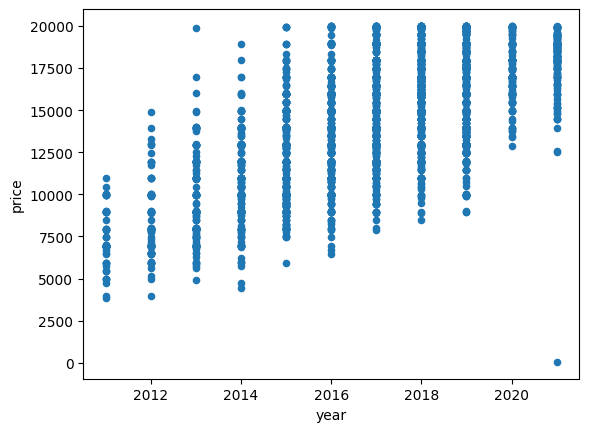

In [38]:
plt.figure()
newer_cars_df.plot.scatter(x="year", y="price")

<AxesSubplot:xlabel='mileage', ylabel='price'>

<Figure size 640x480 with 0 Axes>

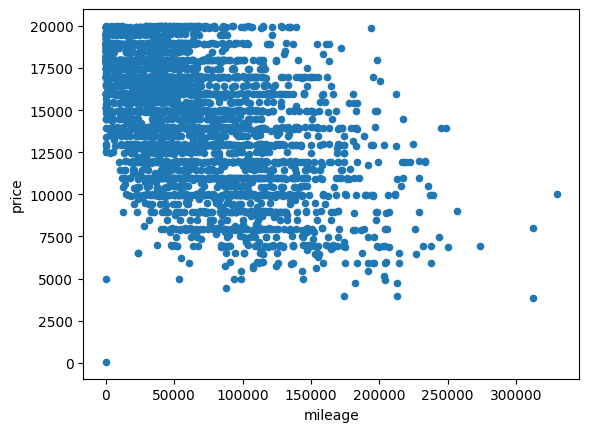

In [39]:
plt.figure()
newer_cars_df.plot.scatter(x="mileage", y="price", )

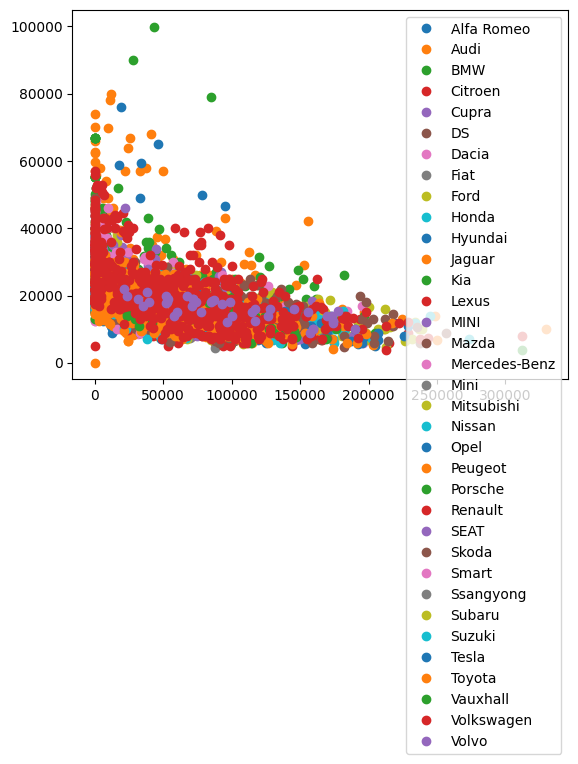

In [35]:
groups = newer_cars_df.groupby("make")
for name, group in groups:
    plt.plot(group["mileage"], group["price"], marker="o", linestyle="", label=name)
plt.legend()